In [72]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from tools import get_mids

In [176]:
class Mephistogram:
    """My elegantly programmed histogram class.
    
    Currently only working for 1D and 2D histograms.
    """

    def __init__(self, histo, bins, axis_names=None):
        """TODO"""
        self.histo = histo
        self.ndim = np.ndim(self.histo)
        self.shape = np.shape(self.histo)
        self.set_bins(bins)
        self.set_names(axis_names)

    def __repr__(self) -> str:
        rep_str = f"Mephistogram with {self.ndim} dimensions and shape {self.shape}."
        rep_str += f"\nAxis names are {self.axis_names}."
        return rep_str


    def set_bins(self, bins):
        """TODO"""
        if self.ndim > 1:
            # check that we got the correct number of bin edges
            assert self.ndim == len(
                bins
            ), "The number of bins should match the histogram dimensions."

            bin_mids = []
            for idx, b in enumerate(bins):
                # check the correct bin length
                assert (
                    len(b) == self.shape[idx] + 1
                ), "The bin length should match the corresponding histogram axis length."

                bin_mids.append(get_mids(b))  # calc the bin mids
            self.bin_mids = tuple(bin_mids)
        else:
            # check the correct bin length
            assert (
                len(bins) == self.shape[0] + 1
            ), "The bin length should match the corresponding histogram axis length."

            self.bin_mids = get_mids(bins)  # calc the bin mids
        # set bins
        self.bins = bins

    def set_names(self, axis_names):
        """TODO"""
        # generate default axis names
        if axis_names is None:
            axis_names = (
                "axis-0"
                if self.ndim == 1
                else tuple([f"axis-{i}" for i in range(self.ndim)])
            )

        # check for the correct number of axis names
        if self.ndim == 1:
            assert type(axis_names) is str
        else:
            assert self.ndim == len(
                axis_names
            ), "The number of axis_names should match the histogram dimensions."

        # set names
        self.axis_names = axis_names

    def match(self, mephisto, matmul=False, verbose=False):
        """TODO"""
        if matmul:
            # only for ndim==2
            if self.ndim != 2:
                raise NotImplementedError("Ö")

            if self.shape[1] == mephisto.shape[0] and (self.bins[1] == mephisto.bins[0]).all():
                if verbose: print("Matrix multiplication possible.")
                return True
            else:
                if verbose: print("Matrix multiplication not possible.")
                return False

        else:
            if self.shape == mephisto.shape and self.bins == mephisto.bins:
                if verbose: print("Elementary arithmetic possible.")
                return True
            else:
                if verbose: print("Elementary arithmetic not possible.")
                return False

    def T(self):
        """Create transposed mephistogram"""
        if self.ndim==1:
            return self
        elif self.ndim==2:
            return Mephistogram(self.histo.T, self.bins[::-1], self.axis_names[::-1])
        else:
            raise NotImplementedError("Ö")

    def __add__(self, mephisto):
        """Add two mephistograms"""
        if self.match(mephisto):
            return Mephistogram(self.histo + mephisto.histo, self.bins, self.axis_names)
        else:
            print("Addition not possible.")
            return None

    def __matmul__(self, mephisto):
        """Matrix-multiply two mephistograms"""
        if self.match(mephisto, matmul=True):
            new_bins = (self.bins[0], mephisto.bins[1])
            new_names = (self.axis_names[0], mephisto.axis_names[1])
            return Mephistogram(self.histo @ mephisto.histo, new_bins, new_names)
        else:
            print("Matmul not possible.")
            return None
        

    def plot(self, **kwargs):
        """TODO"""
        plt.figure()
        if self.ndim == 2:
            plt.pcolormesh(*self.bins, self.histo.T, **kwargs)
            plt.xlabel(self.axis_names[0])
            plt.ylabel(self.axis_names[1])
        elif self.ndim == 1:
            plt.bar(
                get_mids(self.bins),
                height=self.histo,
                width=np.diff(self.bins),
                **kwargs,
            )
            plt.xlabel(self.axis_names)
        else:
            print(f"No plotting possible with {self.ndim} dimensions.")


Mephistogram with 2 dimensions and shape (9, 6).
Axis names are ('x-axis', 'y-axis').


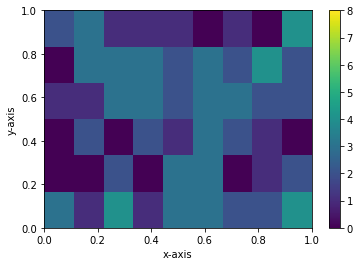

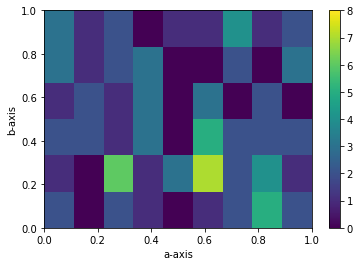

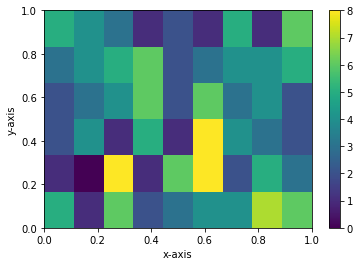

In [177]:
# addition test
bins = (np.linspace(0, 1, num=10), np.linspace(0, 1, num=7))

nums = np.random.uniform(size=(2, 100))
h1, xb, yb = np.histogram2d(*nums, bins=bins)
mh1 = Mephistogram(h1, bins, ("x-axis", "y-axis"))

nums = np.random.uniform(size=(2, 100))
h2, xb, yb = np.histogram2d(*nums, bins=bins)
mh2 = Mephistogram(h2, bins, ("a-axis", "b-axis"))
mh3 = mh1 + mh2

print(mh3)

mh1.plot(vmin=0, vmax=8)
plt.colorbar()
mh2.plot(vmin=0, vmax=8)
plt.colorbar()
mh3.plot(vmin=0, vmax=8)
plt.colorbar()

Mephistogram with 2 dimensions and shape (9, 11).
Axis names are ('x-axis', 'b-axis').


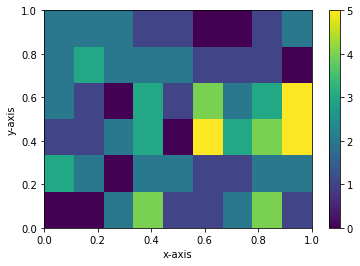

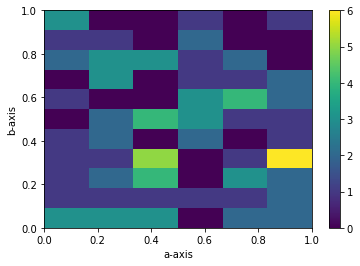

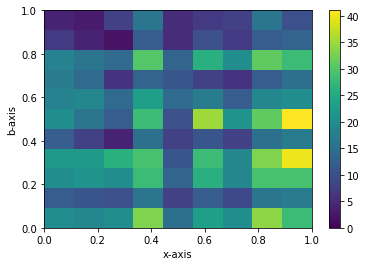

In [178]:
# matmul test
bins = (np.linspace(0, 1, num=10), np.linspace(0, 1, num=7))
nums = np.random.uniform(size=(2, 100))
h1, xb, yb = np.histogram2d(*nums, bins=bins)
mh1 = Mephistogram(h1, bins, ("x-axis", "y-axis"))

bins = (np.linspace(0, 1, num=7), np.linspace(0, 1, num=12))
nums = np.random.uniform(size=(2, 100))
h2, xb, yb = np.histogram2d(*nums, bins=bins)
mh2 = Mephistogram(h2, bins, ("a-axis", "b-axis"))
mh3 = mh1 @ mh2

print(mh3)

mh1.plot(vmin=0)
plt.colorbar()
mh2.plot(vmin=0)
plt.colorbar()
mh3.plot(vmin=0)
plt.colorbar()

In [160]:
my_hist2 + my_hist3

Addition not possible.


In [159]:
my_hist3.T()

Mephistogram with 2 dimensions and shape (9, 4).
Axis names are ('axis-1', 'axis-0').

In [142]:
my_hist2.match(my_hist3.T(), matmul=True)

Matrix multiplication possible.


True

In [145]:
my_T = my_hist.T()

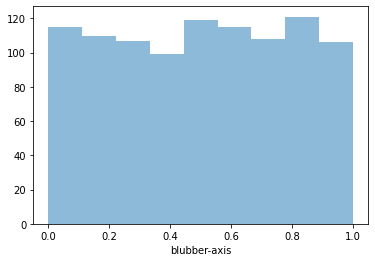

In [144]:
nums = np.random.uniform(size=1000)
bins = np.linspace(0, 1, num=10)

h, xb = np.histogram(nums, bins=bins)

my_hist = Mephistogram(h, bins, axis_names="blubber-axis")
my_hist.plot(alpha=0.5)